# End-to-end Network
1. Input memory representation
2. Output memory representation
3. Generating final prediction

<img src='qa_bot_network.png'>

In [1]:
import pickle
import numpy as np

In [2]:
with open('train_qa.txt','rb') as f:
    train_data = pickle.load(f)

In [3]:
with open('test_qa.txt','rb') as f:
    test_data = pickle.load(f)

In [4]:
display(type(test_data))
display(len(test_data))
display(type(train_data))
display(len(train_data))

list

1000

list

10000

In [5]:
# [([story], [question], answer)]
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [6]:
print(' '.join(train_data[0][0]))
print(' '.join(train_data[0][1]))
train_data[0][2]

Mary moved to the bathroom . Sandra journeyed to the bedroom .
Is Sandra in the hallway ?


'no'

In [7]:
# Starting to create a vocabulary
all_data = train_data + test_data
display(len(all_data))

vocab = set()

for story,question,answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

vocab.add('no')
vocab.add('yes')

vocab

11000

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [8]:
# Account for Keras pad sequence length, where zero is a placeholder
vocab_len = len(vocab) + 1
vocab_len

38

In [9]:
# Longest story
all_story_len = [len(data[0]) for data in all_data]
max_story_len = max(all_story_len)
# Longest question
max_question_len = max([len(data[1]) for data in all_data])
display(max_story_len)
display(max_question_len)

156

6

## Manual process of implementing Keras for the vectorization of the data

In [10]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [11]:
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)
tokenizer.word_index

{'discarded': 1,
 'grabbed': 2,
 'moved': 3,
 'there': 4,
 'took': 5,
 'picked': 6,
 'in': 7,
 'milk': 8,
 'is': 9,
 'put': 10,
 'office': 11,
 'yes': 12,
 'kitchen': 13,
 'dropped': 14,
 'down': 15,
 'john': 16,
 'travelled': 17,
 'apple': 18,
 'left': 19,
 'up': 20,
 'mary': 21,
 '?': 22,
 'sandra': 23,
 'to': 24,
 'football': 25,
 'daniel': 26,
 'back': 27,
 'the': 28,
 'journeyed': 29,
 'went': 30,
 'bedroom': 31,
 'hallway': 32,
 'got': 33,
 'no': 34,
 'bathroom': 35,
 '.': 36,
 'garden': 37}

In [12]:
train_story_text = []
train_question_text = []
train_answers = []

for s, q, a in train_data:
    train_story_text.append(s)
    train_question_text.append(q)
#     train_answers.append(a)

In [13]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)
display(len(train_story_seq))

display(train_story_seq[:2])
display(train_story_text[:2])

10000

[[21, 3, 24, 28, 35, 36, 23, 29, 24, 28, 31, 36],
 [21,
  3,
  24,
  28,
  35,
  36,
  23,
  29,
  24,
  28,
  31,
  36,
  21,
  30,
  27,
  24,
  28,
  31,
  36,
  26,
  30,
  27,
  24,
  28,
  32,
  36]]

[['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.']]

In [14]:
def vectorize_stories(data,word_index=tokenizer.word_index, max_story_len=max_story_len, max_question_len=max_question_len):
    '''
    INPUT: 
    
    data: consisting of Stories,Queries,and Answers
    word_index: word index dictionary from tokenizer
    max_story_len: the length of the longest story (used for pad_sequences function)
    max_question_len: length of the longest question (used for pad_sequences function)


    OUTPUT:
    
    Vectorizes the stories,questions, and answers into padded sequences. We first loop for every story, query , and
    answer in the data. Then we convert the raw words to an word index value. Then we append each set to their appropriate
    output list. Then once we have converted the words to numbers, we pad the sequences so they are all of equal length.
    
    Returns this in the form of a tuple (X,Xq,Y) (padded based on max lengths)
    '''

    # Stories = X
    X = []
    # Questions = Xq
    Xq = []
    # Correct answer (yes/no) = Y
    Y =[]
    
    for s, q, a in data:
        # For each story, create a list of what indexes are associated with each word
        x = [word_index[word.lower()] for word in s]
        # For each story, create a list of what indexes are associated with each word
        xq = [word_index[word.lower()] for word in q]
        
        # empty matrix with plus one for padding
        y = np.zeros(len(word_index)+1)
        
        y[word_index[a]] = 1
        
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
        # pad the sequences based on their max length so the RNN can be trained on uniformly long sequences
        
    return (pad_sequences(X,maxlen=max_story_len), pad_sequences(Xq,maxlen=max_question_len), np.array(Y))


In [15]:
s_train, q_train, a_train = vectorize_stories(train_data)
s_test, q_test, a_test = vectorize_stories(test_data)

In [16]:
display(s_train)
display(a_train)

array([[ 0,  0,  0, ..., 28, 31, 36],
       [ 0,  0,  0, ..., 28, 32, 36],
       [ 0,  0,  0, ..., 28, 35, 36],
       ...,
       [ 0,  0,  0, ..., 28, 31, 36],
       [ 0,  0,  0, ...,  8,  4, 36],
       [ 0,  0,  0, ..., 18,  4, 36]])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
display(tokenizer.word_index['yes'])
display(tokenizer.word_index['no'])

12

34

In [18]:
# Train has 5012 yes-es, 4988 no-es
sum(a_test)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0., 497.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0., 503.,   0.,   0.,   0.])

## Creating the model with Keras

In [19]:
# Read the paper to understand the network and the encoders: https://arxiv.org/pdf/1503.08895.pdf

In [20]:
from keras.models import Sequential,Model
from keras.layers.embeddings import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout, add, dot, concatenate, LSTM

In [21]:
# Have two inputs: story and a question
# Need to be linked together for the answer yes/no

In [22]:
# Placeholder for shape=(max_X_len, batch_size)
# not inputting anything for batch size lets it be editable - just leave a comma
story_input = Input((max_story_len,))
question_input = Input((max_question_len,))

In [23]:
# Create input encoders

# Start by defining the vocabulary size - same as vocab_len from earlier
vocab_size = len(vocab) + 1

# Input Encoder M
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,
                              output_dim=64))
input_encoder_m.add(Dropout(rate=0.4))
# Encoder should output: (samples, story_maxlen, embedding_dim)

# Input Encoder C
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,
                              output_dim=max_question_len))
input_encoder_c.add(Dropout(rate=0.4))
# Encoder should output: (samples, story_maxlen, max_question_len)

# Question Encoder
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,
                               output_dim=64,
                               input_length=max_question_len)) # match output to Encoder C
question_encoder.add(Dropout(rate=0.2))
# Encoder should output: (samples, question_maxlen, embedding_dim)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [24]:
# Now, pass in the inputs into the encoders
# Encoded <-- Encoder(Input)
input_encoded_m = input_encoder_m(story_input)
input_encoded_c = input_encoder_c(story_input)
question_encoded = question_encoder(question_input)

# Use the dot product to compute the match between the first input vector sequence and the question
match = dot([input_encoded_m,question_encoded], axes=(2,2))
match = Activation('softmax')(match)

# Add the match matrix with the second input matrix
response = add([match, input_encoded_c])
response = Permute((2,1))(response)

In [25]:
answer = concatenate([response,question_encoded])
# Now, we will reduce our answer tensor with an RNN
answer = LSTM(32)(answer)
answer = Dropout(rate=0.5)(answer)
answer = Dense(vocab_size)(answer)
# Output: (samples, vocab_size) # Yes/No
answer = Activation('softmax')(answer)

In [26]:
model = Model([story_input,question_input],answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 156)          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 6)            0                                            
__________________________________________________________________________________________________
sequential_1 (Sequential)       multiple             2432        input_1[0][0]                    
__________________________________________________________________________________________________
sequential_3 (Sequential)       (None, 6, 64)        2432        input_2[0][0]                    
__________________________________________________________________________________________________
dot_1 (Dot

## Fitting and training the network
* this takes a long time, so we will use transfer learning instead

In [27]:
%%time
history = model.fit([s_train,q_train], a_train, 
                    batch_size=32, epochs=1000, 
                    validation_data=([s_test, q_test], a_test), 
                    verbose=0)

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Wall time: 1h 33min 35s


In [28]:
# model.save('1000e_qa_model.h5')

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


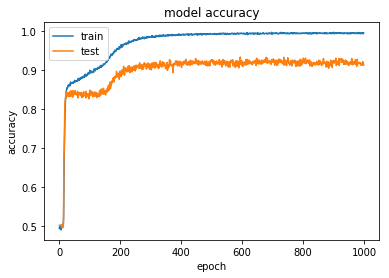

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [59]:
# model.load_weights('chatbot_10.h5')

In [60]:
pred_res = model.predict(([s_test,q_test]))

In [61]:
pred_res[0]

array([1.3639576e-15, 1.3890511e-15, 1.4147305e-15, 1.3375814e-15,
       1.3907531e-15, 1.3659362e-15, 1.3527031e-15, 1.3120955e-15,
       1.5547677e-15, 1.4341014e-15, 1.3951050e-15, 1.4149302e-15,
       8.2171721e-11, 1.4609090e-15, 1.4164748e-15, 1.3910025e-15,
       1.4147683e-15, 1.4092687e-15, 1.3637911e-15, 1.5128997e-15,
       1.4335873e-15, 1.4006133e-15, 1.4383804e-15, 1.5340536e-15,
       1.3331242e-15, 1.3388474e-15, 1.4009392e-15, 1.4856368e-15,
       1.2718624e-15, 1.3962709e-15, 1.3710208e-15, 1.3949506e-15,
       1.3698289e-15, 1.4721649e-15, 1.0000000e+00, 1.4081779e-15,
       1.3307361e-15, 1.3958236e-15], dtype=float32)

In [62]:
#The question:
display(test_data[0][1])
#The answer:
display(test_data[0][2])

['Is', 'John', 'in', 'the', 'kitchen', '?']

'no'

In [63]:
#The question:
display(test_data[2][1])
#The answer:
display(test_data[2][2])

['Is', 'John', 'in', 'the', 'garden', '?']

'yes'

In [64]:
# If this predicts "no", we are in business!
val_max = np.argmax(pred_res[0])

In [65]:
#Generate prediction from model
val_max = np.argmax(pred_res[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_res[0][val_max])
print("Correct answer is: ", test_data[0][2])

Predicted answer is:  no
Probability of certainty was:  1.0
Correct answer is:  no


# Write your own story and question

In [66]:
# Write your own story and question
# Note - the model can only estimate from words the vocab
vocab
# Only use words from this list and enter the values in the same structure

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [75]:
my_story = "John left the kitchen . Sandra left the football in the garden ."
my_story.split()
my_question = "Is the football in the garden ?"
my_question.split()
my_data = [(my_story.split(),my_question.split(),'yes')]
my_data

[(['John',
   'left',
   'the',
   'kitchen',
   '.',
   'Sandra',
   'left',
   'the',
   'football',
   'in',
   'the',
   'garden',
   '.'],
  ['Is', 'the', 'football', 'in', 'the', 'garden', '?'],
  'yes')]

In [76]:
my_story, my_ques, my_ans = vectorize_stories(my_data)

In [77]:
display(my_story)
display(my_ques)

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 16,
        19, 28, 13, 36, 23, 19, 28, 25,  7, 28, 37, 36]])

array([[28, 25,  7, 28, 37, 22]])

In [80]:
pred_res = model.predict(([my_story,my_ques]))
#Generate prediction from model
val_max = np.argmax(pred_res[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_res[0][val_max])
print("Correct answer is: ", my_data[0][2])

Predicted answer is:  no
Probability of certainty was:  0.9999995
Correct answer is:  yes


In [81]:
tokenizer.word_index

{'discarded': 1,
 'grabbed': 2,
 'moved': 3,
 'there': 4,
 'took': 5,
 'picked': 6,
 'in': 7,
 'milk': 8,
 'is': 9,
 'put': 10,
 'office': 11,
 'yes': 12,
 'kitchen': 13,
 'dropped': 14,
 'down': 15,
 'john': 16,
 'travelled': 17,
 'apple': 18,
 'left': 19,
 'up': 20,
 'mary': 21,
 '?': 22,
 'sandra': 23,
 'to': 24,
 'football': 25,
 'daniel': 26,
 'back': 27,
 'the': 28,
 'journeyed': 29,
 'went': 30,
 'bedroom': 31,
 'hallway': 32,
 'got': 33,
 'no': 34,
 'bathroom': 35,
 '.': 36,
 'garden': 37}

In [82]:
print("Probability of certainty was: ", pred_res[0][12])

Probability of certainty was:  4.3402483e-07


In [97]:
x = 1
for word in tokenizer.word_index.keys():
    print(word , pred_res[0][x])
    x += 1

discarded 1.6286314e-13
grabbed 1.723715e-13
moved 1.6576299e-13
there 1.7161599e-13
took 1.6169317e-13
picked 1.6424855e-13
in 1.5533873e-13
milk 1.8158236e-13
is 1.7378308e-13
put 1.5983254e-13
office 1.6442e-13
yes 4.3402483e-07
kitchen 1.6382022e-13
dropped 1.6998874e-13
down 1.6630927e-13
john 1.7071949e-13
travelled 1.7719104e-13
apple 1.7174108e-13
left 1.8358757e-13
up 1.713321e-13
mary 1.7394624e-13
? 1.7031003e-13
sandra 1.7352969e-13
to 1.6493072e-13
football 1.6056618e-13
daniel 1.6130719e-13
back 1.7804306e-13
the 1.6002442e-13
journeyed 1.6244216e-13
went 1.6711503e-13
bedroom 1.5508443e-13
hallway 1.6710865e-13
got 1.7316335e-13
no 0.9999995
bathroom 1.7931801e-13
. 1.656034e-13
garden 1.6870866e-13
